In [1]:
import cv2
from matplotlib import pyplot as plt
from models_training import MatcherFactory

%matplotlib inline


In [10]:
def draw_matches(image1, kp1, des1, image2, kp2, des2, good_matches=None, title=None):
    bad_matches = []

    if good_matches is None:
        bf = cv2.BFMatcher()
        matches = bf.knnMatch(des1, des2, k=2)

        good_matches = [[m] for m, n in matches if m.distance < 0.6 * n.distance]
        bad_matches = [[m] for m, n in matches if m.distance >= 0.6 * n.distance]

    img_correct_matches = cv2.drawMatchesKnn(image1, kp1, image2, kp2, good_matches, None, flags=2, matchColor=(0, 255, 0))
    img_incorrect_matches = cv2.drawMatchesKnn(image1, kp1, image2, kp2, bad_matches[:100], None, flags=2, matchColor=(255, 0, 0))
    combined_img = cv2.addWeighted(img_correct_matches, 0.5, img_incorrect_matches, 0.5, 0)

    plt.imshow(cv2.cvtColor(combined_img, cv2.COLOR_BGR2RGB))
    plt.title(title or 'Matches')
    plt.axis('off')
    plt.show()

In [11]:
def process_images(image1, image2, method_name):
    matcher = MatcherFactory.create_matcher(method_name)
    kp1, des1 = matcher.detect_and_compute(image1)
    kp2, des2 = matcher.detect_and_compute(image2)

    draw_matches(image1, kp1, des1, image2, kp2, des2, title=method_name)

In [12]:
img1_path = 'data/T36UYA_20190621T083609_TCI.jpg'
img2_path = 'data/T36UYA_20190626T083601_TCI.jpg'

In [13]:
image1 = cv2.imread(img1_path, cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread(img2_path, cv2.IMREAD_GRAYSCALE)

## SIFT

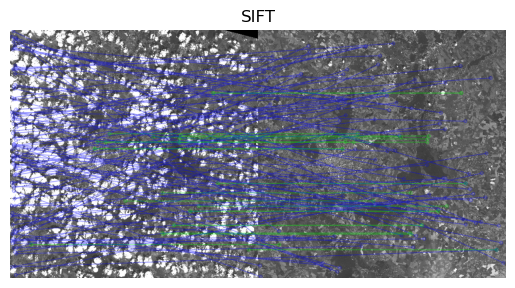

In [14]:
process_images(image1, image2, 'SIFT')

## ORB

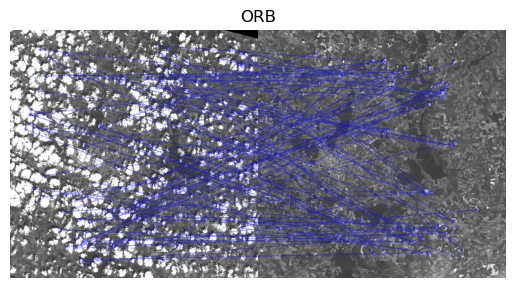

In [15]:
process_images(image1, image2, 'ORB')

## SuperGlue 

Loaded SuperPoint model
Loaded SuperGlue model ("outdoor" weights)


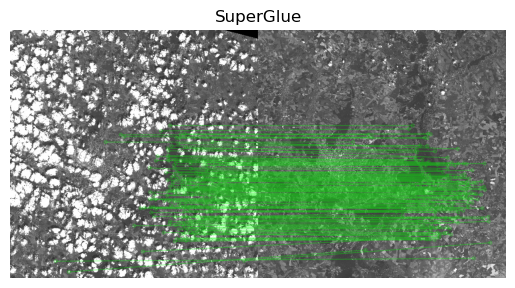

In [16]:
matcher = MatcherFactory.create_matcher('SuperGlue')

kp1, kp2, matches = matcher.detect_and_match(image1, image2)
kp1_cv = [cv2.KeyPoint(x=float(kp[0]), y=float(kp[1]), size=1) for kp in kp1]
kp2_cv = [cv2.KeyPoint(x=float(kp[0]), y=float(kp[1]), size=1) for kp in kp2]
good_matches = [[cv2.DMatch(i, m, 0)] for i, m in enumerate(matches) if m > -1]

draw_matches(image1, kp1_cv, None, image2, kp2_cv, None, good_matches, title='SuperGlue')